# Pandas

Pandas är ett Python-bibliotek för att hantera strukturerad data (t.ex. excel/csv-filer). Det erbjuder verktyg för statistik, bekväma funktioner för att importera data och möjligheten att filtrera och extrahera information. Huvudstrukturen i Pandas kallas "DataFrame". Med en DataFrame kan du lagra och manipulera tabulära data, liknande ett Excel-ark. Den fungerar på sätt som liknar en generalisering av dictionaries för att associera fler än 2 objekt, och på andra sätt liknar den en 2D numpy-array.

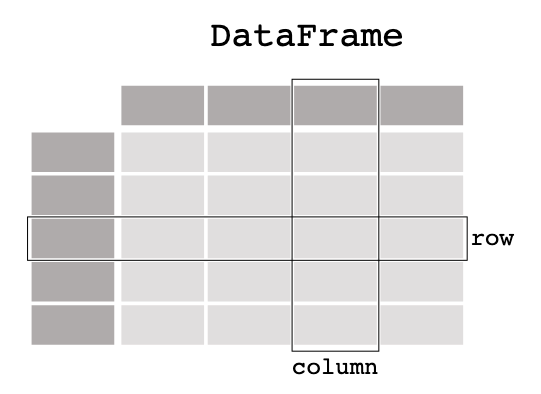

Till skillnad från en NumPy-array kan en DataFrame innehålla olika datatyper, som exempelvis nummer och text, men datan i varje kolumn måste vara av samma typ.

## Skapa en DataFrame

En DataFrame kan läsas in från olika datakällor eller så kan den skapas från grunden. Till exempel kan vi skapa en DataFrame som innehåller information om kemiska föreningar, såsom molekylvikter, kokpunkter och lösligheter:

In [1]:
import pandas as pd
import numpy as np

data = {
    'Compound': ['Water', 'Ethanol', 'Benzene', 'Methanol', 'Acetone', 'Toluene', 'Tetrachloroethylene'],
    'MolecularWeight': [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    'BoilingPoint': [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    'Solubility': ['Infinite', 'Miscible', '0.178 g/100 mL', 'Miscible', 'Miscible', 'None', '206 mg/L']
}

df = pd.DataFrame(data)
print(df)

              Compound  MolecularWeight  BoilingPoint      Solubility
0                Water          18.0150        100.00        Infinite
1              Ethanol          46.0700         78.37        Miscible
2              Benzene          78.1134         80.10  0.178 g/100 mL
3             Methanol          32.0420         64.70        Miscible
4              Acetone          58.0800         56.08        Miscible
5              Toluene          92.1400        110.60            None
6  Tetrachloroethylene         165.8000        121.20        206 mg/L


In [2]:
df

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Pandas har även en mycket kraftfull läs-funktion som kan, genom sina många alternativ, även hantera mycket komplicerade filer, till exempel CSV-filer eller Excel-filer. Titta på denna fil på internet "http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat" som mättes vid en storskalig forskningsanläggning. 

Istället för att läsa hela filen så kan vi välja ut vilken data vi vill läsa. Från denna fil vill vi:

1. Ignorera de första 30 raderna ('skiprows').
2. Separera kolumnerna med lika många vita tecken som det finns genom att använda "\s+" som separator. (regular expression)
3. Endast läsa kolumnerna med namnen "Energy" och "PR" som vi räknade till att vara kolumn 2 och 14.
4. Ge dem rätt namn och använda värdena under "Energy" som rad index (index_col=0).

In [3]:
df_aps=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=30,sep='\s+',names=['Energy','PR'],index_col=0,usecols=[2,14])
df_aps

,PR
Energy,
8.9289,0.159088
8.9339,0.161629
8.9389,0.162415
8.9439,0.163639
8.9489,0.165013
...,...
9.0249,1.005790
9.0259,1.014520
9.0269,1.025750


<Axes: xlabel='Energy'>

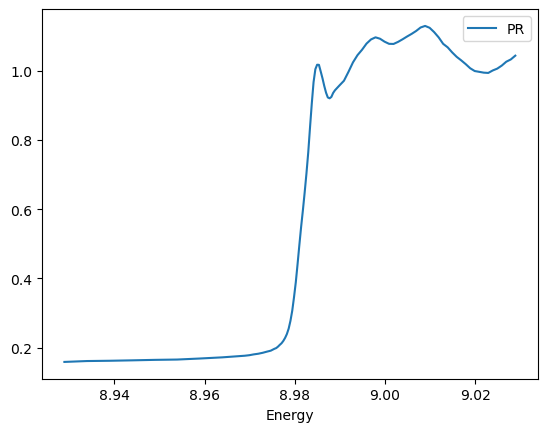

In [4]:
df_aps.plot()

Observera att det även finns en `read_excel` funktion för att läsa excel filer.

Vi återgår nu till vår ursprungliga DataFrame med kemiska föreningar. 

Istället för att skriva ut alla rader så kan vi visa endast de första raderna med `head` (eller de sista genom att använda `tail`):

In [5]:
df.head() #default 5 rows

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible


In [6]:
df.head(3)

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL


# Åtkomst och modifiering av data

Precis som med numpy kan vi få åtkomst till formen (d.v.s. antal rader och kolumner) på en DataFrame.

In [7]:
print(df.shape)

(7, 4)


Vi kan också få åtkomst till en lista över kolumn namnen.

In [8]:
print(df.columns)

Index(['Compound', 'MolecularWeight', 'BoilingPoint', 'Solubility'], dtype='object')


För att komma åt data i en DataFrame kan vi använda olika metoder och indexeringsfunktioner. 

De två viktigaste funktionerna för att få åtkomst till data är `.loc`, som tar namnet på rader/kolumner (som i en dictionary):

In [9]:
df.loc[0,'MolecularWeight'] #rad 0, kolumn 'MolecularWeight'

18.015

och `.iloc.`, som istället tar index (som i numpy):

In [10]:
df.iloc[0,1]

18.015

Observera att här är namnen på raderna helt enkelt index, vilket är standard. Men vi kan välja en specifik kolumn att bli namnet på raderna (så som vi gjorde ovan med index_col när vi läste CSV filen):

In [11]:
df_compound = df.set_index('Compound')
df_compound

,MolecularWeight,BoilingPoint,Solubility
Compound,,,
Water,18.0150,100.00,Infinite
Ethanol,46.0700,78.37,Miscible
Benzene,78.1134,80.10,0.178 g/100 mL
Methanol,32.0420,64.70,Miscible
Acetone,58.0800,56.08,Miscible
Toluene,92.1400,110.60,None
Tetrachloroethylene,165.8000,121.20,206 mg/L


In [12]:
df_compound.loc['Water','MolecularWeight']

18.015

`loc` och `iloc` tillåter användning av slicing:

In [13]:
print(df.loc[:, 'MolecularWeight']) #en kolumn

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64


In [14]:
print(df.loc[:,['MolecularWeight', 'BoilingPoint']]) #två kolumner

   MolecularWeight  BoilingPoint
0          18.0150        100.00
1          46.0700         78.37
2          78.1134         80.10
3          32.0420         64.70
4          58.0800         56.08
5          92.1400        110.60
6         165.8000        121.20


In [15]:
df.loc[0,:] #en rad

Compound              Water
MolecularWeight      18.015
BoilingPoint          100.0
Solubility         Infinite
Name: 0, dtype: object

In [16]:
print(df.iloc[:4, :2])

   Compound  MolecularWeight
0     Water          18.0150
1   Ethanol          46.0700
2   Benzene          78.1134
3  Methanol          32.0420


För att få en specifik kolumn kan vi också använda enklare åtkomst i dictionary-stil:

In [17]:
print(df['MolecularWeight'])

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64


eller till och med, förutsatt att du använt ett namn utan mellanslag:

In [18]:
df.MolecularWeight

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64

För att filtrera DataFrame baserat på en given villkor kan du använda boolean-indexering. Låt oss, till exempel, säga att vi vill titta lite närmare på endast större molekyler. För att hitta och välja alla molekyler med en vikt över 50 g/mol och spara dem i en ny DataFrame:

In [19]:
filtered_df = df[df['MolecularWeight'] > 50]
filtered_df

,Compound,MolecularWeight,BoilingPoint,Solubility
2,Benzene,78.1134,80.10,0.178 g/100 mL
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Om du använder siffror som rad index så kan du också använda slicing för att filtrera. Låt oss skapa en ny DataFrame utifrån tre Gaussian fördelningar:

In [20]:
x_values = np.arange(-10,10,0.1)
df_function={}
df_function['0'] = np.exp(-x_values**2)
df_function['1'] = np.exp(-(x_values-1)**2)
df_function['2'] = np.exp(-(x_values-2)**2)
df_function = pd.DataFrame(df_function,index=x_values) #använd x som index
df_function

,0,1,2
-10.0,3.720076e-44,2.820770e-53,2.894640e-63
-9.9,2.721434e-43,2.520418e-52,3.159064e-62
-9.8,1.951452e-42,2.207454e-51,3.379375e-61
-9.7,1.371615e-41,1.895068e-50,3.543467e-60
-9.6,9.449755e-41,1.594674e-49,3.641954e-59
...,...,...,...
9.5,6.381503e-40,4.190093e-32,3.723363e-25
9.6,9.449755e-41,7.578445e-33,8.225281e-26
9.7,1.371615e-41,1.343540e-33,1.781067e-26
9.8,1.951452e-42,2.334723e-34,3.780278e-27


In [21]:
df_function.loc[-1:1,:]

,0,1,2
-9.000000e-01,0.444858,0.027052,0.000223
-8.000000e-01,0.527292,0.039164,0.000394
-7.000000e-01,0.612626,0.055576,0.000682
-6.000000e-01,0.697676,0.077305,0.001159
-5.000000e-01,0.778801,0.105399,0.001930
-4.000000e-01,0.852144,0.140858,0.003151
-3.000000e-01,0.913931,0.184520,0.005042
-2.000000e-01,0.960789,0.236928,0.007907
-1.000000e-01,0.990050,0.298197,0.012155
-3.552714e-14,1.000000,0.367879,0.018316


Observera att detta endast fungerar om raderna är sorterade!

**Övning** Vi har en CSV-fil som innehåller information om alla kemiska element. Vi läsar den och skapar ett "periodic table" DataFrame.

In [22]:
df_pt = pd.read_csv("ptable.csv")
df_pt.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence,discovery_location
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0,England
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN,Scotland/Sweden
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0,Sweden
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0,Germany/France
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0,England/France


**Uppgift 1** Skriv ut alla element som upptäcktes före år 1850.

In [23]:
### BEGIN SOLUTION
df_pt[df_pt["Year"]<1850].Element
### END SOLUTION

0       Hydrogen
2        Lithium
3      Beryllium
4          Boron
6       Nitrogen
7         Oxygen
10        Sodium
11     Magnesium
12      Aluminum
13       Silicon
14    Phosphorus
16      Chlorine
18     Potassium
19       Calcium
21      Titanium
22      Vanadium
23      Chromium
24     Manganese
26        Cobalt
27        Nickel
32       Arsenic
33      Selenium
34       Bromine
37     Strontium
38       Yttrium
39     Zirconium
40       Niobium
41    Molybdenum
43     Ruthenium
44       Rhodium
45     Palladium
47       Cadmium
51     Tellurium
52        Iodine
55        Barium
56     Lanthanum
57        Cerium
64       Terbium
67        Erbium
72      Tantalum
73      Tungsten
75        Osmium
76       Iridium
77      Platinum
82       Bismuth
89       Thorium
91       Uranium
Name: Element, dtype: object

**Uppgift 2** Vilken element upptäcktes tidigast? **Tips** Använd np.argmin

In [24]:
### BEGIN SOLUTION
earliest_element = df_pt.iloc[np.argmin(df_pt["Year"])]
print(earliest_element["Element"], "upptäckades i", earliest_element["Year"])
### END SOLUTION

Arsenic upptäckades i 1250.0


**Uppgift 3** Hur många element upptäcktes först i Sverige? (ni kan ignorera de som upptäcktes i två länder).

In [25]:
### BEGIN SOLUTION
print(len(df_pt[df_pt["discovery_location"] == 'Sweden']))
print(df_pt[df_pt["discovery_location"] == 'Sweden'].shape[0])
### END SOLUTION

17
17


Du får hela listan med:

In [43]:
df_pt[df_pt["discovery_location"].str.contains('Sweden', na=False)]["Element"]

1          Helium
2         Lithium
7          Oxygen
13        Silicon
16       Chlorine
20       Scandium
22       Vanadium
24      Manganese
26         Cobalt
27         Nickel
33       Selenium
41     Molybdenum
56      Lanthanum
57         Cerium
64        Terbium
67         Erbium
68        Thulium
72       Tantalum
89        Thorium
101      Nobelium
Name: Element, dtype: object

Det finns många sätt att ändra en befintlig DataFrame efter att den har skapats. Du kan till exempel byta namn på rader eller kolumner:

In [28]:
dg = df.rename(columns={"Compound": "Name"})
dg

,Name,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Notera att den här funktion returnera en ny DataFrame (som i detta fallet har sparats som `dg`). Originalet finns dock fortfarande kvar:

In [29]:
df

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Om vi vill utföra operationen direkt på plats (i befintlig DataFrame) behöver vi ange `inplace=True`:

In [30]:
df.rename(columns={"Compound": "Name"}, inplace=True)
df

,Name,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Du kan lägga till nya kolumner i befintliga DataFrames. Till exempel, för att konvertera kokpunkterna från Celsius till Fahrenheit och lägga till detta som en ny kolumn:

In [31]:
df['BoilingPoint (°F)'] = df['BoilingPoint']*1.8 + 32
df.head()

,Name,MolecularWeight,BoilingPoint,Solubility,BoilingPoint (°F)
0,Water,18.0150,100.00,Infinite,212.000
1,Ethanol,46.0700,78.37,Miscible,173.066
2,Benzene,78.1134,80.10,0.178 g/100 mL,176.180
3,Methanol,32.0420,64.70,Miscible,148.460
4,Acetone,58.0800,56.08,Miscible,132.944


Du kan också ta bort rader eller kolumner:

In [32]:
df.drop(columns = "BoilingPoint (°F)", inplace=True)
df

,Name,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


## Inbyggda analysfunktioner

Du kan få statistisk analys för specifika kolumner:

In [33]:
print("Medelvärdet för molekylmassa är",df['MolecularWeight'].mean())
print("Standardavvikelsen är", df['MolecularWeight'].std())

Medelvärdet för molekylmassa är 70.0372
Standardavvikelsen är 49.31466729361561


För att skriva ut sammanfattande statistik för varje (numerisk) kolumn i DataFrame, använd `describe()`:

In [34]:
df.describe()

,MolecularWeight,BoilingPoint
count,7.000000,7.000000
mean,70.037200,87.292857
std,49.314667,24.050028
min,18.015000,56.080000
25%,39.056000,71.535000
50%,58.080000,80.100000
75%,85.126700,105.300000
max,165.800000,121.200000


Det är möjligt att sortera DataFrame, till exempel baserat på en specifik kolumn, genom att använda sort_values(). För att sortera föreningarna baserat på deras molekylvikter i stigande ordning:

In [35]:
sorted_df = df.sort_values('MolecularWeight', ascending=True)
sorted_df

,Name,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
3,Methanol,32.0420,64.70,Miscible
1,Ethanol,46.0700,78.37,Miscible
4,Acetone,58.0800,56.08,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
5,Toluene,92.1400,110.60,None
6,Tetrachloroethylene,165.8000,121.20,206 mg/L


Pandas har också inbyggda matplotlib-funktioner för att snabbt plotta alla eller specifika kolumner. Till exempel:

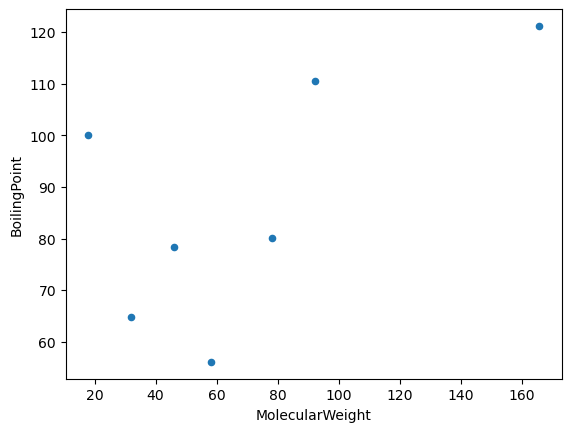

In [36]:
fig = df.plot("MolecularWeight", "BoilingPoint", kind="scatter")

Den returnerar matplotlib-figurobjektet, så att vi kan fortsätta att plotta extra saker. Till exempel vi kan plotta tättheten i vår "periodic table" DataFrame och även lägga till linjer mellan de olika perioderna (raderna i det periodiska systemet).

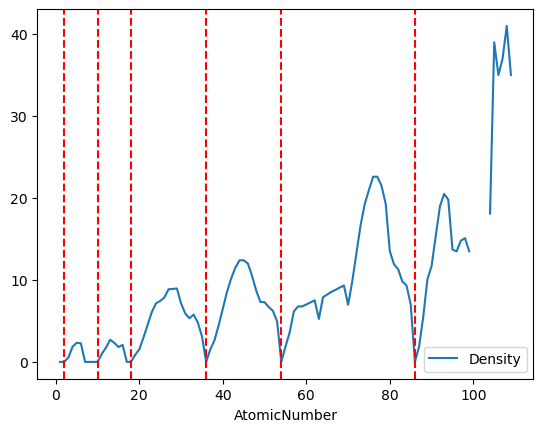

In [37]:
fig = df_pt.plot("AtomicNumber", "Density")
period = np.array(df_pt["Period"])
for i in np.where(period[:-1] != period[1:])[0]:
    fig.axvline(x = i+1, color = 'r', ls='--')

**Övning** I vår "periodic table" DataFrame, plotta upptäcktsår mot atomnummer. Anpassa kurvan till en linjär funktion. Använd det för att beräkna hur många år det är i genomsnitt mellan två upptäckter av grundämnen.

**Tips** Data innehåller flera NaN-värden (icke-numerisk) vilket kan göra det svårt att hantera. Du kan skapa en dataset utan dessa genom att använda:`df_nona = df_pt.dropna(subset=['Year'])`

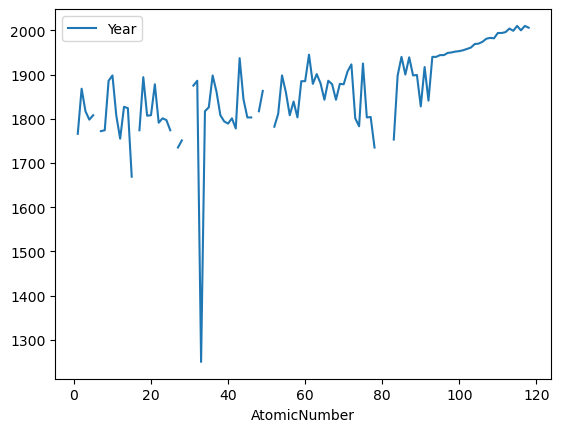

In [38]:
### BEGIN SOLUTION
fig = df_pt.plot("AtomicNumber", "Year")
### END SOLUTION

i genomsnitt en grundämnen upptäckas varje 1.8011935753715487 år


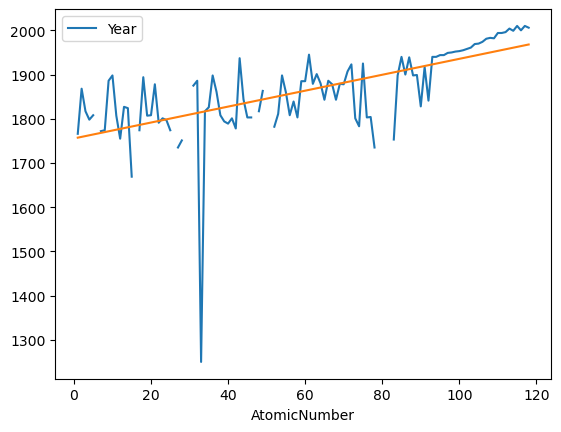

In [39]:
### BEGIN SOLUTION
import math
from scipy.optimize import curve_fit

def linear(x,A,B):
    return A*x+B

df_nona = df_pt.dropna(subset=['Year'])

# Optimera
popt,pcov = curve_fit(linear, xdata=df_nona["AtomicNumber"], ydata=df_nona["Year"])

A_opt, B_opt = popt

fig = df_pt.plot("AtomicNumber", "Year")
fig.plot(df_nona["AtomicNumber"], linear(df_nona["AtomicNumber"], A_opt, B_opt))

print("i genomsnitt en grundämnen upptäckas varje",A_opt, "år")
### END SOLUTION

# Bonus: RDKit

**Obs!** Man behöver installer RDKit (se [här](https://www.rdkit.org/docs/Install.html))

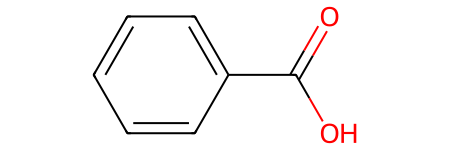

In [40]:
from rdkit import Chem
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m

In [41]:
print("Antal atomer:", m.GetNumAtoms())
for atom in m.GetAtoms():
    print(atom.GetSymbol())
print("Antal atomer inkl. väte:", Chem.AddHs(m).GetNumAtoms())
print("Molmass:",Descriptors.MolWt(m),"g/mol")

Antal atomer: 9
C
C
C
C
C
C
C
O
O
Antal atomer inkl. väte: 15
Molmass: 122.12299999999998 g/mol


,Name,MolecularWeight,BoilingPoint,Solubility,Structure
0,Water,18.0150,100.00,Infinite,
1,Ethanol,46.0700,78.37,Miscible,
2,Benzene,78.1134,80.10,0.178 g/100 mL,
3,Methanol,32.0420,64.70,Miscible,
4,Acetone,58.0800,56.08,Miscible,
5,Toluene,92.1400,110.60,None,
6,Tetrachloroethylene,165.8000,121.20,206 mg/L,

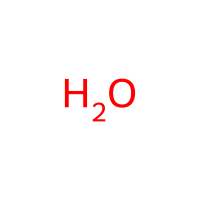
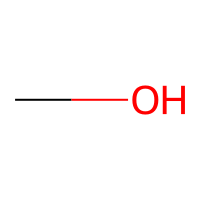
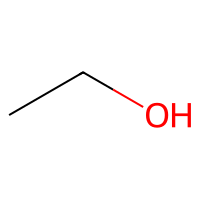
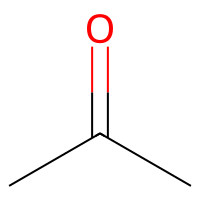
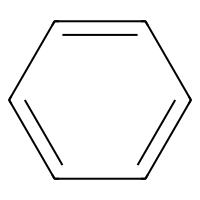
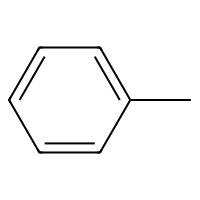
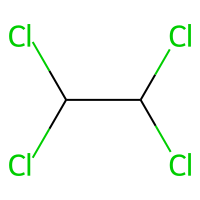

In [42]:
from rdkit.Chem import PandasTools

mollist = []
mollist.append(Chem.MolFromSmiles('O'))
mollist.append(Chem.MolFromSmiles('CO'))
mollist.append(Chem.MolFromSmiles('CCO'))
mollist.append(Chem.MolFromSmiles('CC(=O)C'))
mollist.append(Chem.MolFromSmiles('c1ccccc1'))
mollist.append(Chem.MolFromSmiles('c1ccccc1C'))
mollist.append(Chem.MolFromSmiles('ClC(Cl)C(Cl)Cl'))
df['Structure'] = mollist

PandasTools.RenderImagesInAllDataFrames(images=True) #Ibland behövs det för att visas som bild
df